###Importing libraries

In [217]:
import numpy as np
import pandas as pd

###Importing dataset

*   List item
*   List item



In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
dataset = pd.read_csv('./drive/My Drive/Colab Notebooks/a1_CompanyReviews_FreshDump.tsv', quoting = 3)
dataset.head()

,Review
0,This product was great!!
1,I hated the interface of the new UI.
2,Best company to work with.
3,Worst company to work with.
4,Bad experience with the delivery team. Too slow!


In [220]:
import chardet
charset=chardet.detect(open('./drive/My Drive/Colab Notebooks/a2_RestaurantReviews_FreshDump.tsv', 'rb').read())['encoding']
print(charset)

ISO-8859-1


###Data cleaning

In [221]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
corpus=[]

for i in range(0, 7):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

###Data transformation

In [223]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='./drive/MyDrive/Colab Notebooks/c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))


In [224]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(7, 1169)

###Predictions (via sentiment classifier)

In [225]:
import joblib
classifier = joblib.load('./drive/MyDrive/Colab Notebooks/c2_Classifier_Sentiment_Model')

In [226]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[1 0 1 0 0 1 0]


In [233]:
dataset['predicted_label'] = y_pred.tolist()
dataset

,Review,predicted_label
0,This product was great!!,1
1,I hated the interface of the new UI.,0
2,Best company to work with.,1
3,Worst company to work with.,0
4,Bad experience with the delivery team. Too slow!,0
5,Authentic and super fast delivery.,1
6,I felt like a number not a customer.,0


In [228]:
dataset.to_csv("./drive/MyDrive/Colab Notebooks/c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

###Visualization

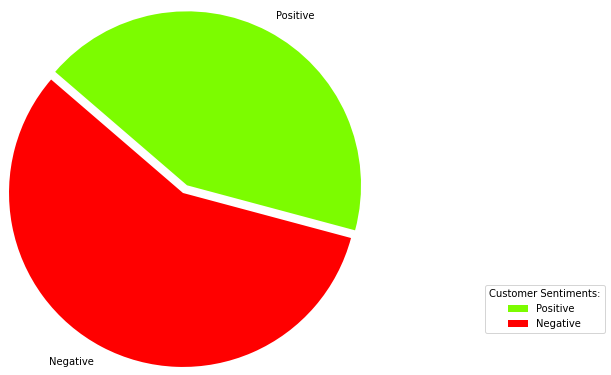

In [264]:
import matplotlib.pyplot as plt
#plt.title("Company Reviews")

pos=0
neg=0

for x in dataset['predicted_label']:
  if x == 1:
    pos=pos+1

neg = dataset['predicted_label'].size - pos

y = np.array([pos, neg])
mylabels = ["Positive", "Negative"]
mycolors = ["LawnGreen", "Red"]
myexplode = [0.1, 0]

plt.pie(y, labels = mylabels, colors = mycolors, radius=2, explode=myexplode, startangle=345)
plt.legend(title = "Customer Sentiments:",bbox_to_anchor=(1.5,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show() 